# Software Carpentry Workshop - SIEPR Fellows
## Foreword
This notebook contains code samples and examples shown during the Software Carpentry workshop for SIEPR fellows, taught on July 10th 2019. These samples and examples assume basic knowledge of Python. For questions, suggestions, and feedback, email me at joaor _squiggly thing_ stanford _point_ edu.

The contents of the workbook are based on the materials of the _Programming and Plotting in Python_ lesson, available [here](https://swcarpentry.github.io/python-novice-gapminder/).

## Overview
This lesson is divided in four episodes:
* Libraries
* Reading Tabular Data into _pandas_ DataFrames
* Indexing, Selecting, and Grouping _pandas_ DataFrames
* Creating plots from datasets using _matplotlib_

## Libraries

Part of Python's popularity stems from the fact that by default, any installation of the language comes with a large collection of _libraries_ or _modules_ - the Python Standard Library. Both terms refer to code, which can include variables, functions, or classes, that programmers like you can (re-)use when writing code. Larry Wall, the creator of the Perl programming language, defined _laziness_ as one of the three great virtues of programmers. Indeed, modules are a great example of such laziness -previously written code that you can just use.

The differences between a library and a module are subtle and mostly linguistic: a library or package (roughly synonymous) may contain multiple modules. For example, the library _matplotlib_, which we will learn at the end of this lesson, is often used through its module _pyplot_. However, you will see that these terms are used interchangeably, even in the Python documentation (The library reference lists all the modules of the Python language). I will use both terms interchangeably throughout the notebook.

More importantly, libraries save you both time and effort. As a scientist, your time is best spent on analysing data instead of on re-writing code to load data from files in CSV format. Libraries also tend to be more robust and more optimized than code you would write yourself, specially if they are used by a lot of people. After all, nobody would use a slow and buggy library - a sort of natural selection law for computer code. Nevertheless, it __always__ pays off to validate any code you did not write on a known sample of data.

So, on to coding.

### Code

To import a library, type use the `import` statement followed by the name of the library, e.g.:

In [1]:
import this  # prints the so-called 'Zen of Python'

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:
# Let's import a slightly more useful library
import math

After importing a module, you can use `print` to check that it really worked. The result is the 'string representation' of the module. For `math`, it reads 'built-in', since it's indeed built in Python itself! For free!

In [156]:
print(math)

<module 'math' (built-in)>


If you try to import a module that your Python interpreter cannot find or load, you will get an error message of the type `ModuleNotFoundError` or `ImportError`. If this happens, check that:
1. You typed the module name correctly - typos are probably 75% of import errors.
2. You evaluated the cell containing the `import` statement when using Jupyter notebooks.
2. You actually installed what you are trying to import, specially if it a third-party module (e.g. numpy, pandas)
3. You are in the right virtual environment, if using venv or conda.

In [1]:
import whatisthis

ModuleNotFoundError: No module named 'whatisthis'

To list the contents of a library, we can use either
the `help()` or the `dir()` functions, with the library itself
as the only parameter.

`dir()` gives a simple list of all members of the library.
It also included the so-called 'dunder' (double-underscore)
methods. If a method's name starts with one or more underscores,
it means you, as a user, should not call it directly.
It's a Python convention to signal internal/accessory methods
that the object (library, function, variable, etc) calls to
do its job.

The `help()` function prints a much nicer listing,
because it includes all the documentation the library
developer wrote to accompany the code!

In [2]:
dir(math)

NameError: name 'math' is not defined

In [5]:
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module is always available.  It provides access to the
    mathematical functions defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    ceil(x, /)
        Return the ceiling of x as an Integral.
        
        This is the smallest integer >= x.
    
    copysign(x, y, /)
        Return a float with the magnitude (absolute value) of

After you import a module, you have access to all its members but they are part of the so-called module's namespace. To access this namespace, use the `library.member` notation, the same way you called for instance the `split()` method for a string, or the `close` method for files.

Let's start by accessing the value of `pi` stored in the `math` module.

In [160]:
print(math.pi)
print(type(math.pi))  # math.pi is just a float someone once wrote in the module, nothing fancy!

3.141592653589793
<class 'float'>


You can assign the value of `math.pi` to a variable of your choice, to make it easier or more practical to access it.

In [3]:
pi = math.pi
print(pi)

NameError: name 'math' is not defined

It is also possible to import specific members of a large module, which can be useful when part of a library requires some pre-processing to use or some dependencies that we did not install. To do so, use the `from ... import ...` syntax.

In [158]:
from math import pi
print(pi)
print(math.pi == pi)  # this should be True

3.141592653589793
True


In [159]:
from math import pi, cos
print(cos(pi))  # cos() is a function of the math module to calcule cosines

-1.0


In [5]:
from math import *  # this notation imports EVERYTHING from the module into the so-called global namespace.
print(pi)
print(sin(pi))

3.141592653589793
1.2246467991473532e-16


While this might seem extremely useful and a time saver - writing `pi` instead of `math.pi` - it is sometimes frowned upon and considered a bad practice in the Python community. Why so? Because you do not know what members the module defines and you risk either re-defining these definitions in your code, or vice-versa. See the following (bad) example:

In [6]:
pi = 3.14
from math import *
print(pi)

3.141592653589793


Another _feature_ of the `import` statement is the ability to give aliases, or nicknames, to anything we import. Using the syntax `import ... as ...` or `from ... import ... as ...`, we can avoid lengthy library names and save precious keystrokes when we are typing! As in the example above, careful with the names you pick to avoid potential conflicts with your own code.

Also remember that, by convention, Python programs should have a maximum of 80-100 characters per line. If you ever login to a cluster and have to open code with `vi`, `nano`, or `emacs`, you will thank you fellow Python coder when they kept their lines short!

In [8]:
import math as m

print(m == math)  # yes, we can compare modules too!
print(m.pi == math.pi)  # should be true!

from math import sin as sine  # numbers don't sin ...

print(sine(m.pi))

True
True
1.2246467991473532e-16


## Exercise 1
>Your introduction to Python students handed in their final assignments but the program you wrote to automatically grade them deleted all their work – forever! You need to submit their grades and you are feeling really bad about all this. But you might have a solution!
>Write a short program that assigns a random passing letter grade to your students. The possible grades are: ‘A’, ‘B’, ‘C’.

The Python documentation website ([link](https://docs.python.org/3/)) contains a 'Library Reference' that you should bookmark immediately. This reference contains links to the documentation of all modules included in Python, which range from CSV parsers to cryptography tools.

The `random` module contains code to handle randomness, for the lack of a better definition. This module defines functions to sample elements of datasets, produce random distributions of numbers, etc. Let's use it to randomly assign grades to our students. How do we know what function to use? Before continuing on, try figuring that out yourself using the `help` function.

In [9]:
import random  # Python module to work with random... stuff?

# Let's start by defining some students!
students = ['Joao', 'Linnea', 'Keith', 'Josh', 'Irina', 'Amy']

# Now let's define the grades we can pick from
possible_grades = ['A', 'B', 'C']  # we do not want to fail anyone!

# using a for-loop, we assign a random grade to each student
for name in students:
    grade = random.choice(possible_grades)
    print(name, grade)

Joao B
Linnea C
Keith C
Josh B
Irina C
Amy A


While Python tries to have one explicit way of doing something, programmers are creative and often find alternative routes. It often pays off to spend a little more time to research if there is a _simpler_ or more direct way of getting what you want. If there are multiple ways, chances are some are optimized for particular use cases.

Below, you will find _another_ way to solve our first exercise, using the `random.choices` (note the plural) method. Unlike `random.choice`, which returns __one__ element from the input sequence, `random.choices` allows you to pick k random elements. You can always set this k to 1, and emulate the behaviour of `random.choice`, but as far as performance goes, you will be slightly worse: `random.choices` returns a list, which you will have to access to get your one random element. This all takes some (albeit negligible) time, and when you are doing something thousands or millions of times, that tiny speck of time adds up. So, in short, read the documentation to pick the best method available!

In [10]:
import random

students = ['Joao', 'Linnea', 'Keith', 'Josh', 'Irina', 'Amy']
possible_grades = ['A', 'B', 'C']

# using a for-loop, we assign a random grade to each student
for name in students:
    grade = random.choices(possible_grades, k=1)
    print(name, grade[0])

Joao B
Linnea A
Keith B
Josh C
Irina B
Amy A


### Beyond the Standard Library
While Python is a great general purpose language with an incredible number of built-in modules, the Standard Library does not include code for every single task you would want to perform. However, from very early on, Python programmers wrote all sort of specialized code to do all sorts of niche (or not niche) tasks. These third-party libraries found their home in package repositories that you can access using the `pip` or `conda` commands (provided you have them installed to begin with).

For example, to install `pandas` you can do `pip install pandas` or `conda install pandas`. To grasp the breadth of libraries available out there, have a look at [PyPI](https://pypi.org).

## Reading Tabular Data into DataFrames

### Introduction
Pandas ([link](https://pandas.pydata.org)) is a third-party library that "aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python."

To this end, `pandas` defines two new data structures: the `Series` and the `DataFrame`. These data structures are very fast and memory'efficient, even on large datasets. Importantly, `pandas` includes read and write support for a variety of file formats, including CSV (comma-separated values), Stata, and Excel, allowing you to load data in any of these formats, or interconvert between them.

Some more general details about `Series` and `DataFrames`:
* The `Series` is a one-dimensional array, meaning it is used to represent several observations of _one_ variable, such as the grades of a group of students. Each entry in this one-dimensional column is labeled numerically by default, starting from 0, but `pandas` allows you to provide custom labels that can be whatever we want (e.g., student names). 

* The `DataFrame` is a collection of `Series` and as such is used to represent _multiple_ variables. For example, the grades of a group of student across several semesters. There are two dimensions in a `DataFrame`, the first (axis 0) being the _rows_ (vertical) and the second (axis 1) being the _columns_ (horizontal). Operations in `pandas` default to the first axis unless you specify otherwise. Keep this in mind.

Generally, both `Series` and `DataFrames` can contain any data type, from decimals to Python objects such as dictionaries or even other `Series` and `DataFrames`. However, and quite logically, some operations (e.g. mean) will only work out of the box for certain data types. `pandas` tries its best to auto-assign data types to your data (per-column in the case of the `DataFrame`) but always best to double-check.

Finally, because a `DataFrame` is a collection of `Series`, both data structures share quite a number of common methods, including arithmetic operations or descriptive operations (e.g. `info`)


### Code

Let's then start by importing `pandas`. Often, people use `pd` as a nickname to avoid long lines of code. You will see this "convention" across many tutorials online. If your import fails, make sure you installed `pandas` with `pip` or `conda`.

In [2]:
import pandas as pd

Let's start simple by reading a CSV file using the `read_csv` function. There are other `read_X` functions available for other file formats, all sharing the same mandatory argument (the name of the input file) and supporting different options.

In [3]:
data = pd.read_csv('gapminder_gdp_oceania.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Our `data` variable now contains the data included in the CSV file. Because the input file contains several columns, `pandas` stored its data in a `DataFrame`. You can use the `print` function to see the contents of a `DataFrame`, 

In [21]:
print(data)

       country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Australia     10039.59564     10949.64959     12217.22686   
1  New Zealand     10556.57566     12247.39532     13175.67800   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     14526.12465     16788.62948     18334.19751     19477.00928   
1     14463.91893     16046.03728     16233.71770     17632.41040   

   gdpPercap_1987  gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  \
0     21888.88903     23424.76683     26997.93657     30687.75473   
1     19007.19129     18363.32494     21050.41377     23189.80135   

   gdpPercap_2007  
0     34435.36744  
1     25185.00911  


Alternatively, in Jupyter, you can just write the variable name and execute the cell to show the contents of your `Series` or `DataFrame` in a nicer format.

In [22]:
data

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


The columns in our `DataFrame` contain the name of countries in Oceania and their values of GDP per capita across several decades. The rows are labelled numerically, which is not very useful. If you know a column that you want to use as row labels, you can pass it to the `index_col` argument of the `read_X` function call.

In [61]:
data = pd.read_csv('gapminder_gdp_oceania.csv', index_col='country')

In [15]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Much better! Now all the values in your `DataFrame` are simply the GDP per capita values and the row labels are the names of the countries.

Let's them have a look at the general structure and contents of our `DataFrame` using the `.info()` method. This method prints a short description of all the columns in the `DataFrame`, the number of entries per column, and the data type (int, float, etc). It also prints the first and last row labels, known as _Indexes_ in `pandas` jargon.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Australia to New Zealand
Data columns (total 12 columns):
gdpPercap_1952    2 non-null float64
gdpPercap_1957    2 non-null float64
gdpPercap_1962    2 non-null float64
gdpPercap_1967    2 non-null float64
gdpPercap_1972    2 non-null float64
gdpPercap_1977    2 non-null float64
gdpPercap_1982    2 non-null float64
gdpPercap_1987    2 non-null float64
gdpPercap_1992    2 non-null float64
gdpPercap_1997    2 non-null float64
gdpPercap_2002    2 non-null float64
gdpPercap_2007    2 non-null float64
dtypes: float64(12)
memory usage: 208.0+ bytes


To print just the column labels of the dataset, you can use `.columns`, which returns a 'list' (actually a `pandas.Index`).

In [29]:
data.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

Likewise, to print the row labels (also known as indexes), use `.index`:

In [62]:
data.index

Index(['Australia', 'New Zealand'], dtype='object', name='country')

The `.head()` and `.tail()` methods allow you to peek the first/last few lines of the `DataFrame`, making them particularly useful to get a quick glimpse of the structure of the dataset. This is obviously more useful for large datasets, unlike the one we have that contains only two rows.

In [4]:
data.head()

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [5]:
data.tail()

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


By default, both `.head()` and `.tail()` return the first/last 10 rows of the `DataFrame`, but you can change that with the `n` parameter:

In [6]:
data.head(n=1)  # prints the first row

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744


In [7]:
data.tail(n=1)  # prints last row

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
1,New Zealand,10556.57566,12247.39532,13175.678,14463.91893,16046.03728,16233.7177,17632.4104,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Switching between rows and columns, i.e., transposing the `DataFrame` is done using the `.T` method. Tranposing is sometimes useful to facilitate access to rows/columns, as we'll see below. Note that this operation does not happen _in place_, meaning that your data is not changed. You will have to assign the result of `data.T` to a variable to store the transposed dataset.

In [8]:
data.T

,0,1
country,Australia,New Zealand
gdpPercap_1952,10039.6,10556.6
gdpPercap_1957,10949.6,12247.4
gdpPercap_1962,12217.2,13175.7
gdpPercap_1967,14526.1,14463.9
gdpPercap_1972,16788.6,16046
gdpPercap_1977,18334.2,16233.7
gdpPercap_1982,19477,17632.4
gdpPercap_1987,21888.9,19007.2
gdpPercap_1992,23424.8,18363.3


In [13]:
data

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [32]:
transposed_data = data.T

Since plenty of `DataFrame` operations return `DataFrame` objects, you can chain several methods after each other. For instance, to extract only the last 2 columns of a dataset, you can combine `.T.` with `.tail()` and `.T` again to return the final `DataFrame` in the same format:

In [15]:
data.T.tail(n=2).T

,gdpPercap_2002,gdpPercap_2007
country,,
Australia,30687.75473,34435.36744
New Zealand,23189.80135,25185.00911


The last of these descriptive methods is `.describe()`, which prints a number of statistics for all columns of the dataset. By default, this method ignores non-numerical columns, as you will see below.

In [17]:
data.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
std,365.560078,917.644806,677.727301,43.986086,525.09198,1485.263517,1304.328377,2037.668013,3578.979883,4205.533703,5301.853680,6540.991104
min,10039.595640,10949.649590,12217.226860,14463.918930,16046.03728,16233.717700,17632.410400,19007.191290,18363.324940,21050.413770,23189.801350,25185.009110
25%,10168.840645,11274.086022,12456.839645,14479.470360,16231.68533,16758.837652,18093.560120,19727.615725,19628.685413,22537.294470,25064.289695,27497.598692
50%,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
75%,10427.330655,11922.958888,12936.065215,14510.573220,16602.98143,17809.077557,19015.859560,21168.464595,22159.406358,25511.055870,28813.266385,32122.777857
max,10556.575660,12247.395320,13175.678000,14526.124650,16788.62948,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440


To include statistics of _all_ columns, use the `include` function parameter:

In [19]:
data = pd.read_csv('gapminder_gdp_oceania.csv')  # re-read the dataset without the index_col option
data.describe(include='all')

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
std,NaN,365.560078,917.644806,677.727301,43.986086,525.09198,1485.263517,1304.328377,2037.668013,3578.979883,4205.533703,5301.853680,6540.991104
min,NaN,10039.595640,10949.649590,12217.226860,14463.918930,16046.03728,16233.717700,17632.410400,19007.191290,18363.324940,21050.413770,23189.801350,25185.009110
25%,NaN,10168.840645,11274.086022,12456.839645,14479.470360,16231.68533,16758.837652,18093.560120,19727.615725,19628.685413,22537.294470,25064.289695,27497.598692
50%,NaN,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
75%,NaN,10427.330655,11922.958888,12936.065215,14510.573220,16602.98143,17809.077557,19015.859560,21168.464595,22159.406358,25511.055870,28813.266385,32122.777857


In this case, `pandas` is smart enough to differentiate between column types and apply the proper descriptive statistics appropriately. Wherever the method (e.g. `mean`) would not yield a significant result (e.g. in a `string`-like column), it adds the value `NaN` (not a number). `NaN` is a sort of blank or null value in `pandas` that is usually ignored when doing calculations.

Finally, `DataFrames` have `.to_X` methods to save their data to disk in a specific format X. For example, `to_csv()` writes the `DataFrame` to a comma-separated value file:

In [23]:
data.to_csv('dataset_copy.csv')

Each _writer_ method has a number of parameters that help control which and how information is written to disk. For example, you can specify a separator between columns when using `to_csv` through the `sep` parameter, replacing the default commas by tabs. Alternatively, you might not want to write the header (column labels) to disk. You can use the `help()` function to figure out which parameters are available for each writer function and how to use them.

In [26]:
data.to_csv('dataset_copy.tsv', sep='\t', header=False)  # saves a tab-separated file without the header row

## Indexing, Selecting, and Grouping _pandas_ DataFrames
Now that we have gone over the basics of `DataFrames`, let's have a look at the indexing and selection features that make `pandas` a very nice data analysis tool. First, load a larger dataset and inspect it with the methods we just learned.

In [3]:
europe = pd.read_csv('gapminder_gdp_europe.csv', index_col='country')

In [33]:
europe.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


There are several ways of accessing values of a `DataFrame`. The first is through numerical indexing, just like regular `list` or `string` objects. Since a `DataFrame` is a two-dimensional array, you can specificy a particular position using two 0-based indexes, separated by a comma. The first index concerns the row (vertical), while the second concerns the column (horizontal).

In [35]:
print(europe.iloc[0, 0])  # returns the first row/first column
print(europe.iloc[1, 0])  # returns the second row/first column
print(europe.iloc[0, 1])  # returns the first row/second column

1601.056136
6137.076492
1942.2842440000002


Like in regular Python indexing, you can also use negative numbers in the `iloc` method:

In [36]:
europe.iloc[-1, 0]  # returns the last row/first column

9979.508487000001

In [37]:
europe.tail(n=1)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
United Kingdom,9979.508487,11283.17795,12477.17707,14142.85089,15895.11641,17428.74846,18232.42452,21664.78767,22705.09254,26074.53136,29478.99919,33203.26128


You can also use regular slicing notation to extract ranges of values. As expected, the slices do not _include_ the value of the last slice index. Importantly, this type of indexing does not return a single value, as in the previous examples, but new `DataFrames` or `Series`, depending on the dimensionality of the result:

In [40]:
europe.iloc[0:1, 0:1]  # returns the first row/first column

,gdpPercap_1952
country,
Albania,1601.056136


In [41]:
europe.iloc[0:2, 0:2]  # returns the first two rows and first two columns.

,gdpPercap_1952,gdpPercap_1957
country,,
Albania,1601.056136,1942.284244
Austria,6137.076492,8842.598030


In [44]:
europe.iloc[0, :]  # returns the entire first column as a Series

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
gdpPercap_1977    3533.003910
gdpPercap_1982    3630.880722
gdpPercap_1987    3738.932735
gdpPercap_1992    2497.437901
gdpPercap_1997    3193.054604
gdpPercap_2002    4604.211737
gdpPercap_2007    5937.029526
Name: Albania, dtype: float64

In [59]:
europe.iloc[999]  # Trying to access a non-existent value returns an IndexError

IndexError: single positional indexer is out-of-bounds

However, it is better to access rows/columns based on their labels instead of keeping track of their indices. To do so, `pandas` provides the `.loc` method:

In [45]:
europe.loc['Albania']  # returns the column 'Albania' as a Series

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
gdpPercap_1977    3533.003910
gdpPercap_1982    3630.880722
gdpPercap_1987    3738.932735
gdpPercap_1992    2497.437901
gdpPercap_1997    3193.054604
gdpPercap_2002    4604.211737
gdpPercap_2007    5937.029526
Name: Albania, dtype: float64

The `.loc` method can also receive two labels, for column and row labels.

In [51]:
europe.loc['Albania', 'gdpPercap_1952']  # returns a single value

1601.056136

In [50]:
europe.loc[:, 'gdpPercap_1952']  # returns all rows in the last column

country
Albania                    1601.056136
Austria                    6137.076492
Belgium                    8343.105127
Bosnia and Herzegovina      973.533195
Bulgaria                   2444.286648
Croatia                    3119.236520
Czech Republic             6876.140250
Denmark                    9692.385245
Finland                    6424.519071
France                     7029.809327
Germany                    7144.114393
Greece                     3530.690067
Hungary                    5263.673816
Iceland                    7267.688428
Ireland                    5210.280328
Italy                      4931.404155
Montenegro                 2647.585601
Netherlands                8941.571858
Norway                    10095.421720
Poland                     4029.329699
Portugal                   3068.319867
Romania                    3144.613186
Serbia                     3581.459448
Slovak Republic            5074.659104
Slovenia                   4215.041741
Spain            

Finally, you can also access columns by their labels using the following notations:

In [56]:
europe['gdpPercap_1952']

country
Albania    1601.056136
Austria    6137.076492
Name: gdpPercap_1952, dtype: float64

In [57]:
europe.gdpPercap_1952

country
Albania    1601.056136
Austria    6137.076492
Name: gdpPercap_1952, dtype: float64

You can also select ranges of values using slicing notation and row/column labels. In this case, however, and unlike the `.iloc` and regular slicing in Python, the last value _is_ included! Very important difference!

In [65]:
europe.loc['Albania':'Italy']  # contains Italy!!

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720
Czech Republic,6876.140250,8256.343918,10136.867130,11399.444890,13108.453600,14800.160620,15377.228550,16310.443400,14297.021220,16048.514240,17596.210220,22833.308510
Denmark,9692.385245,11099.659350,13583.313510,15937.211230,18866.207210,20422.901500,21688.040480,25116.175810,26406.739850,29804.345670,32166.500060,35278.418740
Finland,6424.519071,7545.415386,9371.842561,10921.636260,14358.875900,15605.422830,18533.157610,21141.012230,20647.164990,23723.950200,28204.590570,33207.084400


In [66]:
europe.loc['Albania':'Italy', 'gdpPercap_1952':'gdpPercap_1962']

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962
country,,,
Albania,1601.056136,1942.284244,2312.888958
Austria,6137.076492,8842.598030,10750.721110
Belgium,8343.105127,9714.960623,10991.206760
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679
Bulgaria,2444.286648,3008.670727,4254.337839
Croatia,3119.236520,4338.231617,5477.890018
Czech Republic,6876.140250,8256.343918,10136.867130
Denmark,9692.385245,11099.659350,13583.313510
Finland,6424.519071,7545.415386,9371.842561


`pandas` is also smart enough to do slicing between non-existent labels. In the following example, there is no country called 'Zimbabwe' nor a column containing the GDP per capita in 1960:

In [70]:
europe.loc['Albania':'Zimbabwe', 'gdpPercap_1952':'gdpPercap_1960']

,gdpPercap_1952,gdpPercap_1957
country,,
Albania,1601.056136,1942.284244
Austria,6137.076492,8842.598030
Belgium,8343.105127,9714.960623
Bosnia and Herzegovina,973.533195,1353.989176
Bulgaria,2444.286648,3008.670727
Croatia,3119.236520,4338.231617
Czech Republic,6876.140250,8256.343918
Denmark,9692.385245,11099.659350
Finland,6424.519071,7545.415386


This neat feature works due to string comparison:

In [69]:
'gdpPercap_1960' > 'gdpPercap_1952'

True

You can also specificy which rows/columns to select using lists:

In [71]:
europe.loc['Albania', ['gdpPercap_1952', 'gdpPercap_2007']]

gdpPercap_1952    1601.056136
gdpPercap_2007    5937.029526
Name: Albania, dtype: float64

Note that in this situation, the slicing notation will not work inside each list:

In [72]:
europe.loc['Albania', ['gdpPercap_1952':'gdpPercap_1960', 'gdpPercap_2007']]

SyntaxError: invalid syntax (<ipython-input-72-ddfca3622f03>, line 1)

Trying to access a non-existing column or row using the `.loc` method also returns an error, but this time a KeyError:

In [63]:
europe.loc['America']

KeyError: 'the label [America] is not in the [index]'

Now that we have gone over the basic selection features of `pandas`, let's have a look at some of the built-in analysis methods. Remember that for the majority of built-in functions, the operations run by default over the first axis, so per column.

In [69]:
europe.max()  # returns the maximum value for each column, in a Series

gdpPercap_1952    14734.23275
gdpPercap_1957    17909.48973
gdpPercap_1962    20431.09270
gdpPercap_1967    22966.14432
gdpPercap_1972    27195.11304
gdpPercap_1977    26982.29052
gdpPercap_1982    28397.71512
gdpPercap_1987    31540.97480
gdpPercap_1992    33965.66115
gdpPercap_1997    41283.16433
gdpPercap_2002    44683.97525
gdpPercap_2007    49357.19017
dtype: float64

In [70]:
europe.loc['Albania'].max()  # returns the maximum value for the row 'Albania'

5937.029525999999

In [72]:
europe.loc['Albania'].idxmax()  # returns the column with the maximum value

'gdpPercap_2007'

In [73]:
europe.loc['Italy'].min()  # returns the minimum value of the column

4931.404154999999

In [79]:
europe.loc['Italy'].idxmin()  # returns the column with the minimum value

'gdpPercap_1952'

In [80]:
europe.loc['Italy'].sum()  # sums the GDP per capita of Italy across all columns

194942.50807700003

In [74]:
europe.loc['Italy'].mean()  # returns the average GDP per capita of Italy across all columns

16245.20900641667

In [75]:
europe.mean()  # calculates the mean GDP per capita, per year, for all countries

gdpPercap_1952     5661.057435
gdpPercap_1957     6963.012816
gdpPercap_1962     8365.486814
gdpPercap_1967    10143.823757
gdpPercap_1972    12479.575246
gdpPercap_1977    14283.979110
gdpPercap_1982    15617.896551
gdpPercap_1987    17214.310727
gdpPercap_1992    17061.568084
gdpPercap_1997    19076.781802
gdpPercap_2002    21711.732422
gdpPercap_2007    25054.481636
dtype: float64

To have these functions operate _per row_, we can use the `axis` parameter:

In [76]:
europe.mean(axis=1)

country
Albania                    3255.366633
Austria                   20411.916279
Belgium                   19900.758072
Bosnia and Herzegovina     3484.779069
Bulgaria                   6384.055172
Croatia                    9331.712346
Czech Republic            13920.011379
Denmark                   21671.824888
Finland                   17473.722667
France                    18833.570327
Germany                   20556.684433
Greece                    13969.036833
Hungary                   10888.175654
Iceland                   20531.422272
Ireland                   15758.606238
Italy                     16245.209006
Montenegro                 7208.064560
Netherlands               21748.852208
Norway                    26747.306554
Poland                     8416.553912
Portugal                  11354.091927
Romania                    7300.169974
Serbia                     9305.049444
Slovak Republic           10415.530689
Slovenia                  14074.582109
Spain            

Alternatively, we can use the `.T` method to transpose the rows/columns:

In [84]:
europe.T.mean()

country
Albania                    3255.366633
Austria                   20411.916279
Belgium                   19900.758072
Bosnia and Herzegovina     3484.779069
Bulgaria                   6384.055172
Croatia                    9331.712346
Czech Republic            13920.011379
Denmark                   21671.824888
Finland                   17473.722667
France                    18833.570327
Germany                   20556.684433
Greece                    13969.036833
Hungary                   10888.175654
Iceland                   20531.422272
Ireland                   15758.606238
Italy                     16245.209006
Montenegro                 7208.064560
Netherlands               21748.852208
Norway                    26747.306554
Poland                     8416.553912
Portugal                  11354.091927
Romania                    7300.169974
Serbia                     9305.049444
Slovak Republic           10415.530689
Slovenia                  14074.582109
Spain            

`pandas` also supports standard algebraic operations between `DataFrames`. The column and row labels are matched automatically, i.e., mismatched labels (missing rows, missing columns) are assigned `NaN` values. This feature allows you to easily add, subtract, multiply, etc, different datasets and carry out powerful analysis with relatively few commands, as we will see below.

In [93]:
# Let's calculate the difference in GDP per capita between Germany and The Netherlands
europe.loc['Netherlands'] - europe.loc['Germany']

gdpPercap_1952    1797.457465
gdpPercap_1957    1088.366790
gdpPercap_1962    -111.613350
gdpPercap_1967     617.625750
gdpPercap_1972     778.565400
gdpPercap_1977     696.137970
gdpPercap_1982    -632.072280
gdpPercap_1987    -987.862050
gdpPercap_1992     285.646440
gdpPercap_1997    2457.246470
gdpPercap_2002    3688.955800
gdpPercap_2007    4627.558900
dtype: float64

You can also perform comparisons in a similar way. Comparison operators include the usual `>`, `<`, `!=`, and `==`. The result of these comparison operations, unlike before, are _boolean_ `DataFrames`, with `True`/`False` values per entry in the dataset. These new `DataFrames` are also known as masks, and they can be used to _select_ subsections of the original `DataFrame`. Let's run some examples.

In [94]:
# When is Germany's GDP higher than The Netherlands'?
europe.loc['Germany'] > europe.loc['Netherlands']

gdpPercap_1952    False
gdpPercap_1957    False
gdpPercap_1962     True
gdpPercap_1967    False
gdpPercap_1972    False
gdpPercap_1977    False
gdpPercap_1982     True
gdpPercap_1987     True
gdpPercap_1992    False
gdpPercap_1997    False
gdpPercap_2002    False
gdpPercap_2007    False
dtype: bool

In [90]:
# When was a country's GDP per capita higher than 10.000?
europe > 10000

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,False,False,False,False,False,False,False,False,False,False,False,False
Austria,False,False,True,True,True,True,True,True,True,True,True,True
Belgium,False,False,True,True,True,True,True,True,True,True,True,True
Bosnia and Herzegovina,False,False,False,False,False,False,False,False,False,False,False,False
Bulgaria,False,False,False,False,False,False,False,False,False,False,False,True
Croatia,False,False,False,False,False,True,True,True,False,False,True,True
Czech Republic,False,False,True,True,True,True,True,True,True,True,True,True
Denmark,False,True,True,True,True,True,True,True,True,True,True,True
Finland,False,False,False,True,True,True,True,True,True,True,True,True


In [95]:
# Use the result of a comparison as a boolean mask
rich_countries = europe > 10000  # assign to variable for readability
europe[rich_countries]

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,10750.72111,12834.60240,16661.62560,19749.42230,21597.08362,23687.82607,27042.01868,29095.92066,32417.60769,36126.49270
Belgium,NaN,NaN,10991.20676,13149.04119,16672.14356,19117.97448,20979.84589,22525.56308,25575.57069,27561.19663,30485.88375,33692.60508
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10680.79282
Croatia,NaN,NaN,NaN,NaN,NaN,11305.38517,13221.82184,13822.58394,NaN,NaN,11628.38895,14619.22272
Czech Republic,NaN,NaN,10136.86713,11399.44489,13108.45360,14800.16062,15377.22855,16310.44340,14297.02122,16048.51424,17596.21022,22833.30851
Denmark,NaN,11099.65935,13583.31351,15937.21123,18866.20721,20422.90150,21688.04048,25116.17581,26406.73985,29804.34567,32166.50006,35278.41874
Finland,NaN,NaN,NaN,10921.63626,14358.87590,15605.42283,18533.15761,21141.01223,20647.16499,23723.95020,28204.59057,33207.08440


The resulting `DataFrame` has the same _shape_ (number of columns and rows) as the original one, but has `NaN` values wherever the boolean mask was `False`. Because, as mentioned before, `pandas` ignores `NaN` values in most of its operations (unless told otherwise), this is a particularly powerful way of filtering datasets before calculating certain properties.

In [96]:
# If GDP > 10.000 defines a rich country, what is the average GDP per capita of these countries over time?
europe[rich_countries].mean()

gdpPercap_1952    12414.827235
gdpPercap_1957    12235.053360
gdpPercap_1962    12562.848231
gdpPercap_1967    14244.442589
gdpPercap_1972    15630.413747
gdpPercap_1977    16570.263335
gdpPercap_1982    17927.375400
gdpPercap_1987    19844.531305
gdpPercap_1992    22310.494523
gdpPercap_1997    23644.097234
gdpPercap_2002    26297.621419
gdpPercap_2007    28430.096542
dtype: float64

In [94]:
europe[rich_countries].describe()  # pay special attention to the COUNT row.

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2.000000,6.000000,12.000000,14.000000,19.000000,23.000000,24.000000,24.000000,20.000000,22.000000,23.000000,25.000000
mean,12414.827235,12235.053360,12562.848231,14244.442589,15630.413747,16570.263335,17927.375400,19844.531305,22310.494523,23644.097234,26297.621419,28430.096542
std,3280.134736,2822.857359,2771.809512,3144.104144,4065.167257,4448.730416,4810.928255,5746.825995,6064.166995,7523.823714,8408.520262,9831.063348
min,10095.421720,10187.826650,10136.867130,10022.401310,10168.656110,10172.485720,11222.587620,11732.510170,10535.628550,10159.583680,11628.388950,10680.792820
25%,11255.124478,11143.792873,10703.162215,12875.931215,12554.157885,13108.795365,13750.082937,15291.953978,17554.485747,17917.698205,20315.463615,20509.647770
50%,12414.827235,11279.685695,12403.309495,13731.373285,15895.116410,15605.422830,18049.573135,20174.123525,23292.554685,24970.809725,28926.032340,30470.016700
75%,13574.529992,11561.274268,13039.447560,15337.012762,17924.102455,19702.192385,21448.866250,23660.449225,26431.380680,27993.045785,31664.851010,35278.418740
max,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,31540.974800,33965.661150,41283.164330,44683.975250,49357.190170


## Exercise 2
> Write code to calculate the fold difference in GDP per capita, per year, between rich and poor countries in Europe, assuming that rich countries are those with a GDP above the mean?

In [4]:
# Create boolean masks
rich_mask = europe > europe.mean()
poor_mask = europe <= europe.mean()

# Filter the dataset
rich_countries = europe[rich_mask]
poor_countries = europe[poor_mask]

# Calculate the fold difference per year
fold_diff = (rich_countries.mean() - poor_countries.mean()) / poor_countries.mean()
fold_diff

gdpPercap_1952    1.479723
gdpPercap_1957    1.418867
gdpPercap_1962    1.305139
gdpPercap_1967    1.155305
gdpPercap_1972    1.064774
gdpPercap_1977    0.970558
gdpPercap_1982    0.993247
gdpPercap_1987    1.105052
gdpPercap_1992    1.829686
gdpPercap_1997    1.674966
gdpPercap_2002    1.758684
gdpPercap_2007    1.569074
dtype: float64

## Exercise 3
> Write code to calculate how often each country belonged in the 'rich' category. Hint: in Python, 1 and 0 are also synonymous of True and False, respectively.

In [5]:
# In Python, True and False evaluate as integers 1 and 0, respectively
True + True  # should be 2

2

In [6]:
# We can use the .sum() function on a boolean array to count how many True values there are.
rich_mask.sum(axis=1)

country
Albania                    0
Austria                   12
Belgium                   12
Bosnia and Herzegovina     0
Bulgaria                   0
Croatia                    0
Czech Republic             6
Denmark                   12
Finland                   12
France                    12
Germany                   12
Greece                     4
Hungary                    0
Iceland                   12
Ireland                    4
Italy                      6
Montenegro                 0
Netherlands               12
Norway                    12
Poland                     0
Portugal                   0
Romania                    0
Serbia                     0
Slovak Republic            0
Slovenia                   4
Spain                      4
Sweden                    12
Switzerland               12
Turkey                     0
United Kingdom            12
dtype: int64

## Exercise 4
>Write code to separate European countries in groups based on how often they made it into the 'rich' group, and then calculate the average GDP per capita of each of these groups over time.

In [7]:
rich_score = rich_mask.sum(axis=1) / len(europe.columns)  # normalize by number of countries
rich_score

country
Albania                   0.000000
Austria                   1.000000
Belgium                   1.000000
Bosnia and Herzegovina    0.000000
Bulgaria                  0.000000
Croatia                   0.000000
Czech Republic            0.500000
Denmark                   1.000000
Finland                   1.000000
France                    1.000000
Germany                   1.000000
Greece                    0.333333
Hungary                   0.000000
Iceland                   1.000000
Ireland                   0.333333
Italy                     0.500000
Montenegro                0.000000
Netherlands               1.000000
Norway                    1.000000
Poland                    0.000000
Portugal                  0.000000
Romania                   0.000000
Serbia                    0.000000
Slovak Republic           0.000000
Slovenia                  0.333333
Spain                     0.333333
Sweden                    1.000000
Switzerland               1.000000
Turkey      

You can use the `.groupby()` function of `pandas` to group rows of a `DataFrame` by a specific metric. This metric should be one-dimensional (e.g. a `Series`), mapping row label (in our case, the country name) to the value you want to group by. The result is __not__ a `DataFrame` but a `DataFrameGroupBy` object, which you can consider a sort of dictionary whose keys are our discrete metric values and the values are row labels that belong to that group.

In [8]:
grouped_countries = europe.groupby(rich_score)
grouped_countries

In [13]:
grouped_countries.sum()  # some operations propagate through the different groups and return DataFrames

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0.000000,36916.854200,46110.918793,56850.065437,71324.848786,88569.346898,104459.358438,113553.768507,119649.599409,92380.047256,103772.937598,118590.929863,149577.357928
0.333333,16790.046878,20942.456800,25744.935321,33567.667670,45277.839976,53860.456750,59679.634020,64436.912960,67918.093220,80876.051580,102086.795210,122803.729520
0.500000,11807.544405,14505.000150,18380.449470,21421.846200,25377.727380,29056.145370,31914.712050,35517.678220,36310.666080,40723.538700,45564.308390,51403.028210
1.000000,104317.277560,127332.008735,149989.154201,178000.350040,215162.343140,241143.412730,263388.781960,296825.131210,315238.235970,346930.926170,385109.939210,427850.333420


In [14]:
grouped_countries.mean()  # the answer to our exercise question

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0.000000,3076.404517,3842.576566,4737.505453,5943.737399,7380.778908,8704.946536,9462.814042,9970.799951,7698.337271,8647.744800,9882.577489,12464.779827
0.333333,4197.511720,5235.614200,6436.233830,8391.916917,11319.459994,13465.114187,14919.908505,16109.228240,16979.523305,20219.012895,25521.698802,30700.932380
0.500000,5903.772203,7252.500075,9190.224735,10710.923100,12688.863690,14528.072685,15957.356025,17758.839110,18155.333040,20361.769350,22782.154195,25701.514105
1.000000,8693.106463,10611.000728,12499.096183,14833.362503,17930.195262,20095.284394,21949.065163,24735.427601,26269.852998,28910.910514,32092.494934,35654.194452


In [9]:
grouped_countries.groups  # to access the 'groups' individually

{0.0: Index(['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Hungary',
        'Montenegro', 'Poland', 'Portugal', 'Romania', 'Serbia',
        'Slovak Republic', 'Turkey'],
       dtype='object', name='country'),
 0.3333333333333333: Index(['Greece', 'Ireland', 'Slovenia', 'Spain'], dtype='object', name='country'),
 0.5: Index(['Czech Republic', 'Italy'], dtype='object', name='country'),
 1.0: Index(['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
        'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Switzerland',
        'United Kingdom'],
       dtype='object', name='country')}

In [11]:
# 1.0 = countries that were ALWAYS above the average, in terms of GDP per capita
grouped_countries.get_group(1.0)  # returns a DataFrame with the rows corresponding to this particular group.

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Austria,6137.076492,8842.598030,10750.721110,12834.60240,16661.62560,19749.42230,21597.08362,23687.82607,27042.01868,29095.92066,32417.60769,36126.49270
Belgium,8343.105127,9714.960623,10991.206760,13149.04119,16672.14356,19117.97448,20979.84589,22525.56308,25575.57069,27561.19663,30485.88375,33692.60508
Denmark,9692.385245,11099.659350,13583.313510,15937.21123,18866.20721,20422.90150,21688.04048,25116.17581,26406.73985,29804.34567,32166.50006,35278.41874
Finland,6424.519071,7545.415386,9371.842561,10921.63626,14358.87590,15605.42283,18533.15761,21141.01223,20647.16499,23723.95020,28204.59057,33207.08440
France,7029.809327,8662.834898,10560.485530,12999.91766,16107.19171,18292.63514,20293.89746,22066.44214,24703.79615,25889.78487,28926.03234,30470.01670
Germany,7144.114393,10187.826650,12902.462910,14745.62561,18016.18027,20512.92123,22031.53274,24639.18566,26505.30317,27788.88416,30035.80198,32170.37442
Iceland,7267.688428,9244.001412,10350.159060,13319.89568,15798.06362,19654.96247,23269.60750,26923.20628,25144.39201,28061.09966,31163.20196,36180.78919
Netherlands,8941.571858,11276.193440,12790.849560,15363.25136,18794.74567,21209.05920,21399.46046,23651.32361,26790.94961,30246.13063,33724.75778,36797.93332
Norway,10095.421720,11653.973040,13450.401510,16361.87647,18965.05551,23311.34939,26298.63531,31540.97480,33965.66115,41283.16433,44683.97525,49357.19017


## Exercise 5
> What do the following lines of code do?
>
>```first = pd.read_csv('gapminder_all.csv', index_col='country')
second = first[first['continent'] == 'Americas']
third = second.drop('Puerto Rico')
fourth = third.drop('continent', axis=1)
```

In [15]:
# Read entire gapminder dataset and read row labels from the country column.
first = pd.read_csv('gapminder_all.csv', index_col='country')
# Produce a new DataFrame that contains only rows where column 'continent' is 'Americas'
second = first[first['continent'] == 'Americas']
# Delete row 'Puerto Rico'
third = second.drop('Puerto Rico')
# Delete column 'continent'
fourth = third.drop('continent', axis=1)

## Creating plots from datasets using matplotlib

### Introduction
Matplotlib ([link](https://matplotlib.org/)) is a third-party library that produces publication quality figures in a variety of static formats (e.g. PNG, PDF, JPG) and interactive enviroments. 

The library tries to "make the easy things easy and the hard things possible." In practice, this means that it is very easy to produce simple charts, like line plots or scatter plots, but also possible to change every single bit about them. For example, if you'd like to replace for axis ticks by pictures of french baguettes, you can.

While there are several interfaces to use `matplotlib`, we will focus on the `pyplot` module and on the direct integration with `pandas`.


### Code

Jupyter notebook have a few _magic_ commands that enable specific features. For `matplotlib`, it is practical to have plots and figures show directly in the notebook after issuing the commands. The `%matplotlib` allows us to control this (and other) behavior:

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt  # import the pyplot module, the 'easy' interface to matplotlib

Let's start by plotting a line chart. For simplicity, we will provide the data in two Python lists, corresponding to the x and y axis values:

Text(0,0.5,'Position (km)')

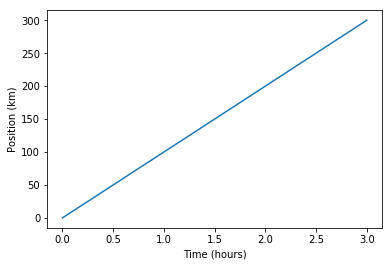

In [19]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hours)')
plt.ylabel('Position (km)')

If instead we would like to plot the same data with points instead of a line connecting the data, and color the points red, we can use the `'ro'` format string (syntax and options [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)):

Text(0,0.5,'Position (km)')

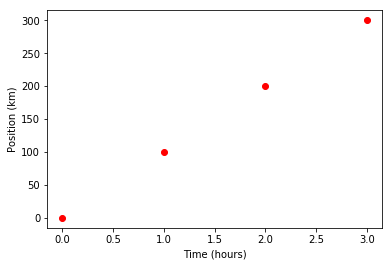

In [42]:
plt.plot(time, position, 'ro')
plt.xlabel('Time (hours)')
plt.ylabel('Position (km)')

Thankfully, `pandas` integrates tightly with `matplotlib`. Although not as flexible as using `matplotlib` itself, this integration makes data visualization very easy and straightforward. Let's give it a try on the Gapminder datasets.

In [65]:
oceania = pd.read_csv('gapminder_gdp_oceania.csv', index_col='country')

In [45]:
oceania.info()  # quick overview of rows and columns

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Australia to New Zealand
Data columns (total 12 columns):
gdpPercap_1952    2 non-null float64
gdpPercap_1957    2 non-null float64
gdpPercap_1962    2 non-null float64
gdpPercap_1967    2 non-null float64
gdpPercap_1972    2 non-null float64
gdpPercap_1977    2 non-null float64
gdpPercap_1982    2 non-null float64
gdpPercap_1987    2 non-null float64
gdpPercap_1992    2 non-null float64
gdpPercap_1997    2 non-null float64
gdpPercap_2002    2 non-null float64
gdpPercap_2007    2 non-null float64
dtypes: float64(12)
memory usage: 208.0+ bytes


Let's start by plotting the GDP per capita of Australia over time using the `.plot()` method of `DataFrames`:

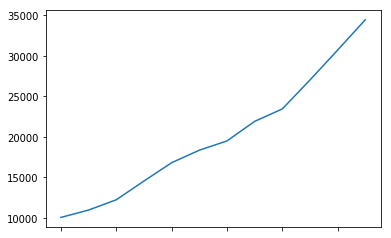

In [54]:
oceania.loc['Australia'].plot()

Works! But the horizontal (x) axis labels are missing ... why so? By default, `pandas` uses ordinals (first col, second col, etc) as x axis labels. If the indexes happen to be numerical, `pandas` is smart enough to use them as labels. Let's change that then.

In [81]:
column_labels = oceania.columns  # get column labels
short_labels = column_labels.str.strip('gdpPercap_')  # use string method 'strip' directly on ALL entries of the dataframe
int_labels = short_labels.astype(int)  # cast strings to integers
oceania.columns = int_labels  # replace original labels
oceania

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


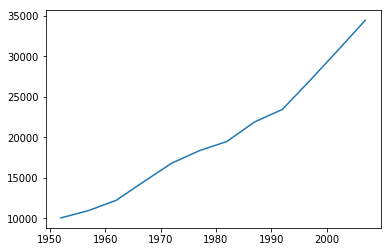

In [82]:
oceania.loc['Australia'].plot()

Works!!! `pandas` interprets the column names as numbers now and labels the x axis appropriately. Much more informative!

What if we want to plot the evolution of the GDP per capita of Australia _and_ New Zealand side by side?

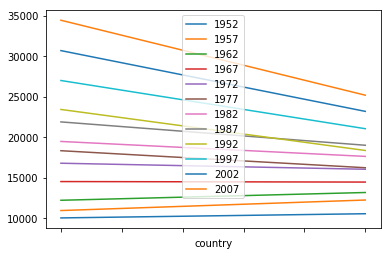

In [83]:
oceania.plot()

Doesn't really work as expected ... The column labels (years) are read as data series, instead of the rows (countries). Let's transpose the `DataFrame` and re-plot:

Text(0,0.5,'GDP Per Capita')

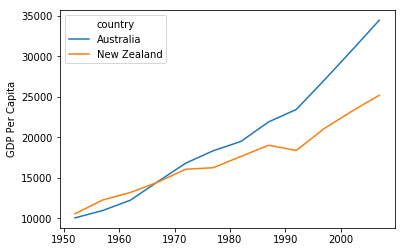

In [85]:
oceania.T.plot()
plt.ylabel('GDP Per Capita')

Nicely plotted! Note that we add the y label using `plt.ylabel`, which refers to the `matplotlib.pyplot` interface. How come? `pandas` integrates with `matplotlib` and as such, we can use the `pyplot` interface to customize our plots as we want. In essence, we can define settings in `matplotlib` and these will be used in `pandas` plots. 

Let's see below how we can customize our plots using this mechanism and the different built-in styles of `matplotlib` (list [here](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)):

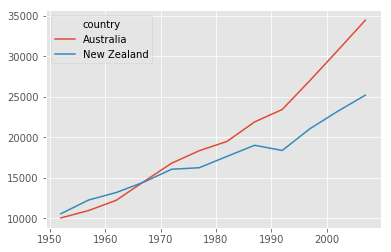

In [86]:
plt.style.use('ggplot')
oceania.T.plot()

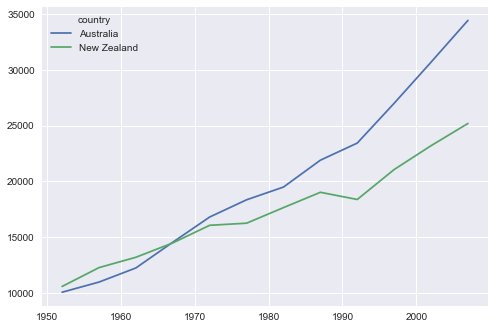

In [87]:
plt.style.use('seaborn')
oceania.T.plot()

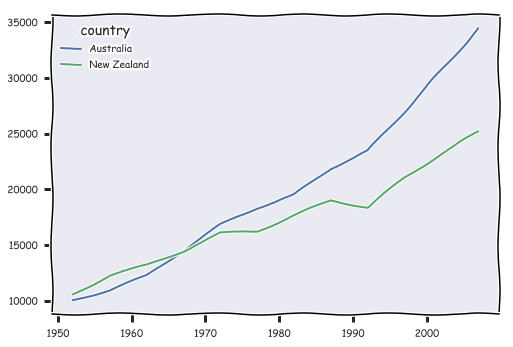

In [89]:
# For fun, there is also a XKCD (from the comics) style.
# However, this is a PERMANENT setting. In order NOT to ruin this Jupyter notebook, we can
# use the 'with' statement of Python that isolates the changes to indented lines (technical term: context manager):
with plt.xkcd():
    oceania.T.plot()

Let's revert the style to the 'classic' style to continue

In [93]:
plt.style.use('default')

`pandas` also offers support to plot other types of charts besides lines. You can choose how to plot your data using the `kind` parameter to `plot()`. Valid options include: `bar`, `barh`, `hist`, `scatter`, `box`, among others. Let's play with a few of these.

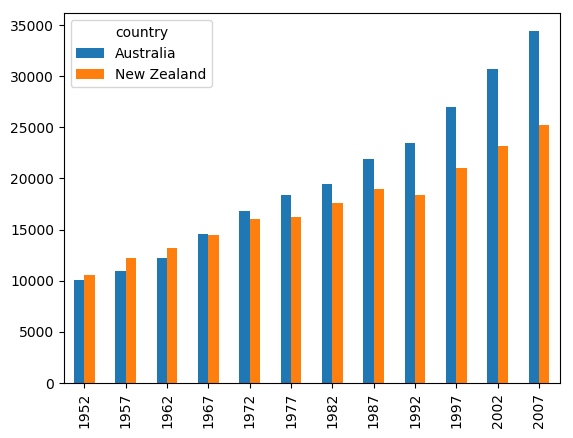

In [94]:
oceania.T.plot(kind='bar')

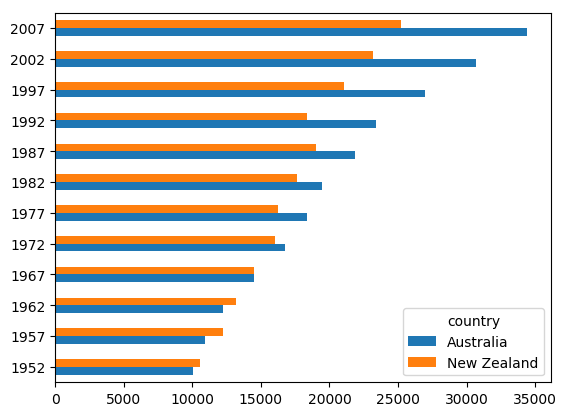

In [95]:
oceania.T.plot(kind='barh')

Plotting in Jupyter is nice, but it'd be also useful to save our charts to separate files, in PNG or PDF format, to include in papers, posters, emails, etc. In a regular Python script, we can simply use the `plt.savefig()` method, but in Jupyter ...

In [99]:
plt.savefig('my_pretty_figure.png')

<Figure size 640x480 with 0 Axes>

0 Axes ... ? If you open the figure (you can switch to the browser tab Jupyter first opened when it launched) you will see that it is just a blank canvas. Our figure was not saved to disk. Why is this? The `.plot()` method of `DataFrames` calls `matplotlib` under the hood and when you call `plt.savefig()`, it requests a new/reset figure canvas.

The trick is to assign the result of `plot()` to a variable. This method returns a `matplotlib.Axis` object that has a `get_figure()` method to get access to the figure you see displayed on the screen. Then, you can call `savefig` directly on this figure object.

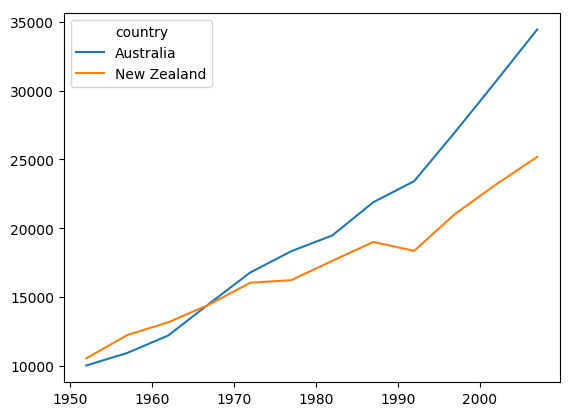

In [111]:
ax = oceania.T.plot()
fig = ax.get_figure()
fig.savefig('my_pretty_figure.png')  # this now writes a proper figure to file, go check!

## Final Exercises

Now that we went over the basic of `pandas.DataFrames`, selection, indexing, and plotting using `matplotlib`, we are ready to do some analysis on our datasets. Let's load the combined Gapminder dataset, which includes far more than just GDP per capita values, and have fun! 

In [3]:
gapminder_all = pd.read_csv('gapminder_all.csv', index_col='country')
gapminder_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Algeria to New Zealand
Data columns (total 37 columns):
continent         142 non-null object
gdpPercap_1952    142 non-null float64
gdpPercap_1957    142 non-null float64
gdpPercap_1962    142 non-null float64
gdpPercap_1967    142 non-null float64
gdpPercap_1972    142 non-null float64
gdpPercap_1977    142 non-null float64
gdpPercap_1982    142 non-null float64
gdpPercap_1987    142 non-null float64
gdpPercap_1992    142 non-null float64
gdpPercap_1997    142 non-null float64
gdpPercap_2002    142 non-null float64
gdpPercap_2007    142 non-null float64
lifeExp_1952      142 non-null float64
lifeExp_1957      142 non-null float64
lifeExp_1962      142 non-null float64
lifeExp_1967      142 non-null float64
lifeExp_1972      142 non-null float64
lifeExp_1977      142 non-null float64
lifeExp_1982      142 non-null float64
lifeExp_1987      142 non-null float64
lifeExp_1992      142 non-null float64
lifeExp_1997      142 non-nul

Let's start with plotting the distribution of population size for all countries in the dataset, for 2007.

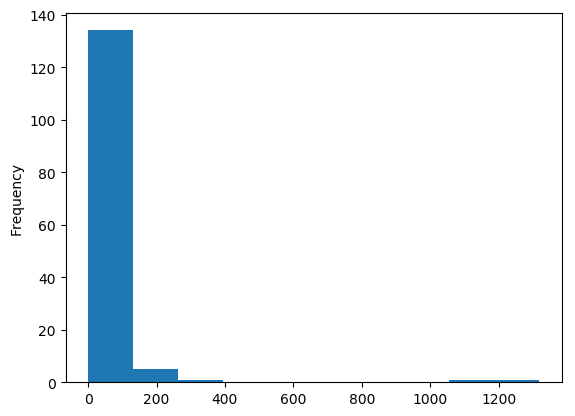

In [124]:
pop_2007 = gapminder_all['pop_2007'] / 1e6  # millions
pop_2007.plot(kind='hist')

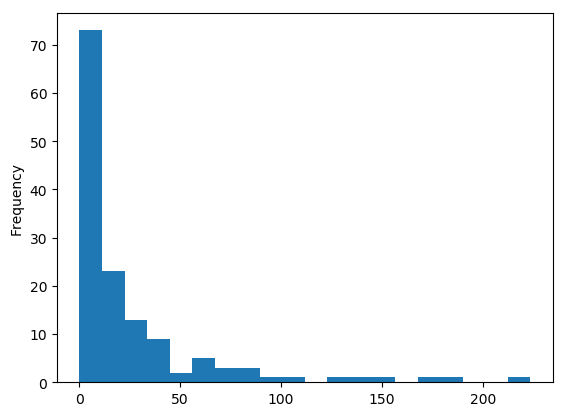

In [130]:
# Let's zoom in on that first peak (countries with less than 300.000.000 inhabitants)
pop_2007_small = pop_2007[pop_2007 < 300]
pop_2007_small.plot(kind='hist', bins=20)

In [135]:
(pop_2007 < 50).sum() / len(pop_2007.index)  # remember, True = 1

0.8450704225352113

Interesting. The majority of countries (84.5%) has less than 50 million inhabitants. But how much of the world population lives in these countries?

In [138]:
pop_2007_tiny = pop_2007[pop_2007 < 50]
pop_2007_tiny.sum() / pop_2007.sum()

0.24804060551477525

25% !!! 75% of the world population lives in 15% of the countries. Wow! And wealth?

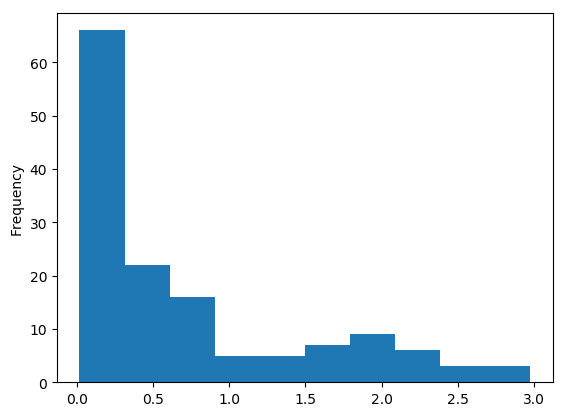

In [150]:
gdp_2007 = gapminder_all['gdpPercap_2007']
gdp_2007_perc = 100* gdp_2007 / gdp_2007.sum()  # percentage
gdp_2007_perc
gdp_2007_perc.plot(kind='hist')

Most countries contribute less than 1% of the world's combined GDP per capita. Who are the top 10 richest countries? How much % of the world's combined GDP do they represent?

In [158]:
gdp_2007_top10 = gdp_2007.sort_values(ascending=False).head(n=10)  # sort by descending value
gdp_2007_top10

country
Norway             49357.19017
Kuwait             47306.98978
Singapore          47143.17964
United States      42951.65309
Ireland            40675.99635
Hong Kong China    39724.97867
Switzerland        37506.41907
Netherlands        36797.93332
Canada             36319.23501
Iceland            36180.78919
Name: gdpPercap_2007, dtype: float64

In [159]:
100* gdp_2007_top10.sum() / gdp_2007.sum()

24.95911024349045

25% !! The 10 richest countries represent a quarter of the world's combined GDP. Let's calculate these values per continent now, to get an idea of the geographical distribution of wealth.

Text(0,0.5,'Cumulative GDP per Capita (2007)')

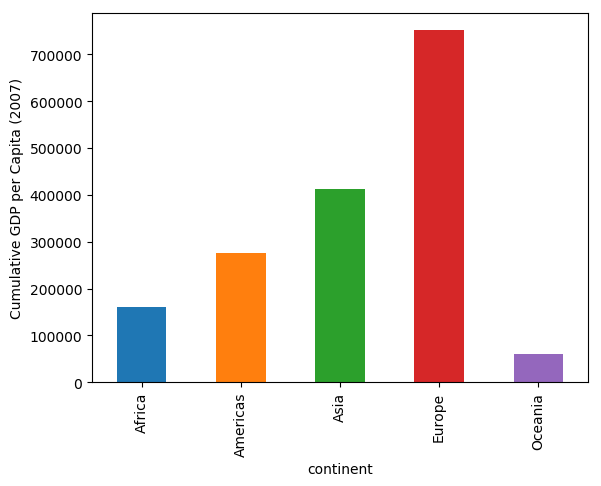

In [180]:
g = gapminder_all['gdpPercap_2007'].groupby(gapminder_all['continent'])  # group countries by continent
g_sum = g.sum()  # this returns a DataFrame
g_sum.plot(kind='bar')
plt.ylabel('Cumulative GDP per Capita (2007)')

Europe comes out as the 'winner', followed by Asia. Note that `pandas` automatically colors the several series differently.

Now let's check the wealth distribution _within_ each continent using box plots. The `.plot(kind='box')` method will not work properly after `.groupby`, because this last returns a collection of `pandas.Series` objects. However, `pandas` has a `DataFrame.boxplot` method that has a `column` parameter and a `by` parameter, allowing us to plot exactly what we want:

Text(0,0.5,'GDP per Capita (2007)')

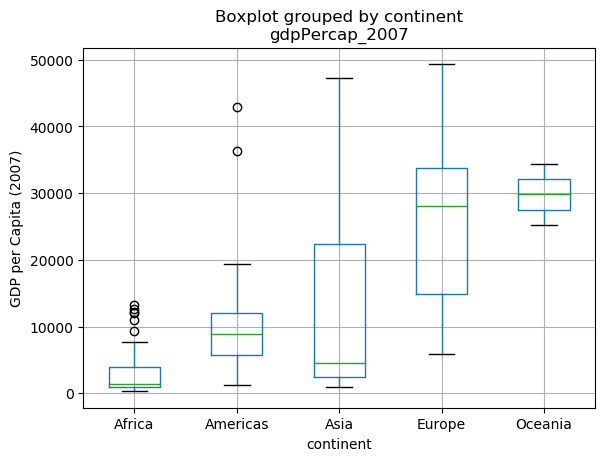

In [179]:
gapminder_all.boxplot(column=['gdpPercap_2007'], by='continent')
plt.ylabel('GDP per Capita (2007)')

Europe and Asia have the largest distribution. The American continent has two clear outliers (guess who?) while Oceania (with only two countries in this dataset) is obviously symmetrical. LEt's do the same plot for population size.

Text(0,0.5,'Population Size (2007)')

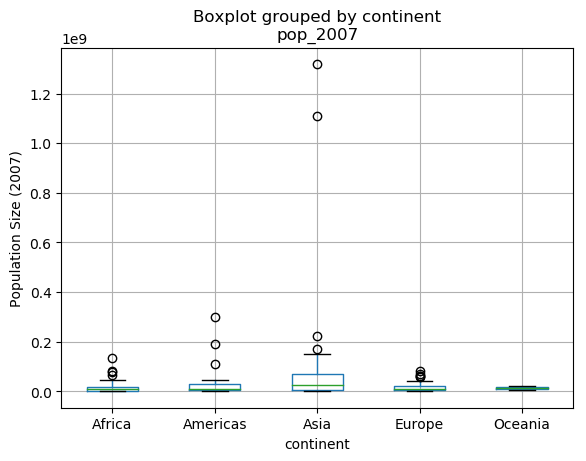

In [182]:
gapminder_all.boxplot(column=['pop_2007'], by='continent')
plt.ylabel('Population Size (2007)')

China and India dwarf everyone else with their larger than 1 billion populations!!

Now let's have a look at another part of the dataset - life expectancy. How did it evolve over time? Does it correlate at all to GDP?

Text(0.5,0,'Change in Life Expectancy between 1952 and 2007')

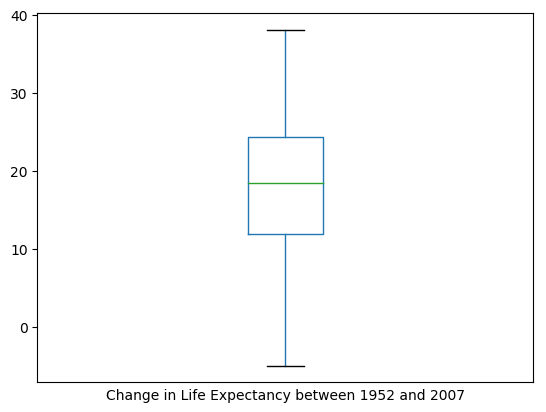

In [196]:
lifeExp_evol = gapminder_all['lifeExp_2007'] - gapminder_all['lifeExp_1952']
lifeExp_evol.plot(kind='box', xticks=[])  # clear the sole x tick and label by providing an empty list
plt.xlabel('Change in Life Expectancy between 1952 and 2007')

The median of life expectancy evolution is around 20 years, with some outliers going as far as adding nearly 40 years! However, there are some countries with a _negative_ change, meaning people life _less_ today (in 2007) than they did in 1952. Let's see who these outliers are.

In [200]:
lifeExp_max = lifeExp_evol.max()
lifeExp_max_country = lifeExp_evol.idxmax()
print(lifeExp_max, lifeExp_max_country)

38.062 Oman


Text(0,0.5,'Life Expectancy (years)')

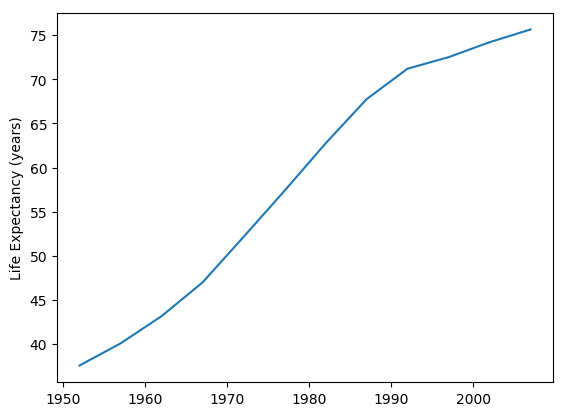

In [241]:
lifeExp_Oman = gapminder_all.loc['Oman', 'lifeExp_1952':'lifeExp_2007']
lifeExp_Oman.index = lifeExp_Oman.index.str.strip('lifeExp_').astype(int)  # same trick as before, but this is a pandas.Series
lifeExp_Oman.plot()
plt.ylabel('Life Expectancy (years)')

In [197]:
lifeExp_neg = lifeExp_evol[lifeExp_evol < 0]
lifeExp_neg

country
Swaziland   -1.794
Zimbabwe    -4.964
dtype: float64

Text(0,0.5,'Life Expectancy (years)')

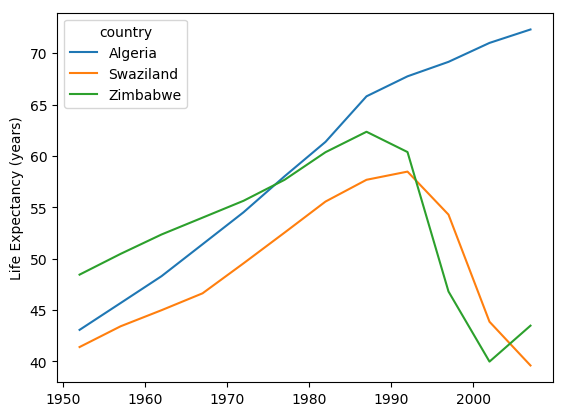

In [239]:
# We can add Algeria as a 'reference' African country
lifeExp_negCountries = gapminder_all.loc[['Algeria', 'Swaziland', 'Zimbabwe'], 'lifeExp_1952':'lifeExp_2007']  # double indexing!
lifeExp_negCountries.columns = lifeExp_negCountries.columns.str.strip('lifeExp_').astype(int)
lifeExp_negCountries.T.plot()
plt.ylabel('Life Expectancy (years)')

What happened in the 1990s that justifies this massive drop? A quick Google search 'blames' economical downturn for Zimbabwe and the HIV/AIDS epidemic for Swaziland.

Let's make a final plot correlating GDP per Capita with life expectancy. Does a higher living standard correlate with longer lifespans?

Text(0,0.5,'Life Expectancy (2007)')

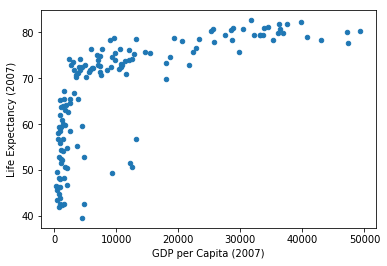

In [59]:
gapminder_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007')
plt.xlabel('GDP per Capita (2007)')
plt.ylabel('Life Expectancy (2007)')

Higher GDP per capita is strongly correlated with a higher life expectancy, while lower GDP per capita is not necessarily associated with a low life expectancy. Or is a matter of scale? There are so many countries in the <10.000 GDP range that is might hard to distinguish a correlation there. Let's try plotting the GDP per Capita on a logarithmic scale.

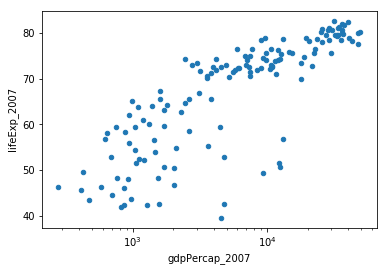

In [60]:
# Add the log as a new column
# gapminder_all['gdpPercap_2007_log'] = np.log(gapminder_all['gdpPercap_2007'])
gapminder_all.plot(x='gdpPercap_2007', y='lifeExp_2007', logx=True, kind='scatter')

Correcting for the very large spread in GDP with a logarithmic scale helps visualize the correlation better. We can also obtain a numerical value for the correlation using the `DataFrame.corr()` method. This method returns the pairwise correlations between all columns of the `DataFrame`. Using the `method` parameter, you can select the type of correlation out of `pearson`, `spearman`, and `kendall`.

In [76]:
gapminder_all.loc[:, ['gdpPercap_2007', 'lifeExp_2007']].corr(method='spearman')  # returns a new DataFrame

,gdpPercap_2007,lifeExp_2007
gdpPercap_2007,1.00000,0.85659
lifeExp_2007,0.85659,1.00000


For the final exercise, let's take this plot and color the countries by continent. To do this, we will use a combination of `groupby` and `matplotlib` to plot multiple series in the same chart. For simplicity, we will also add a new column to the dataset to include the log values of the GDP per capita in 2007. This exercise wraps up several topics we covered throughout the lesson and showcases the potential of combining `pandas` and `matplotlib` to create high-quality figures from raw data.

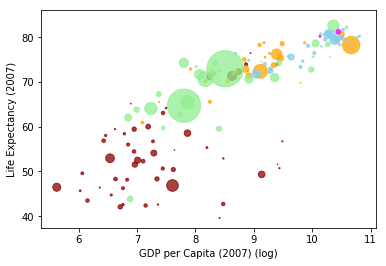

In [9]:
import math  # to access the log function

gdp_2007_log = gapminder_all['gdpPercap_2007'].apply(math.log)  # applies a function on the entire series
gapminder_all['gdpPercap_2007_log'] = gdp_2007_log  # adds a new column

# Use the 'flexible' matplotlib interface
fig, ax = plt.subplots()  # create figure with one subplot (default)

# Create mapping of continent to colors
colors = {'Africa': 'darkred', 
          'Europe': 'skyblue', 
          'Americas': 'orange',
          'Asia': 'lightgreen',
          'Oceania': 'magenta'}

# Use groupby to separate DataFrame by continent
groups = gapminder_all.groupby(gapminder_all['continent'])

for name, g in groups:  # iterate over groups
    ax.scatter(g['gdpPercap_2007_log'], g['lifeExp_2007'],  # x/y data
               c=colors[name],  # color of this particular series
               s=g['pop_2007']/1e6,  # scale the marker by the population size (divided by 1 million)
              alpha=0.75  # transparency
              )

ax.set_xlabel('GDP per Capita (2007) (log)')
ax.set_ylabel('Life Expectancy (2007)')

fig.savefig('world_lifeExp_vs_GDP.png')

This concludes the lesson. Hopefully you learned enough about `pandas` and `matplotlib` to explore your datasets on your own. You should bookmark the online documentation for both libraries and keep it under your pillow:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
* https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

Thanks for reading!